In [1]:
import numpy as np
import scipy.sparse as sps
import scipy.linalg as spl
import scipy.sparse.linalg as spsl
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

from scipy.special import legendre,lpmv,factorial
from pyshtools.legendre import PlmSchmidt_d1

import time

from tools import *

In [2]:
picked = dat_to_xarray("data/fullrun789/picked_mode.dat")

In [3]:
layered_l = dat_to_xarray("data/fullrun789/sph_pwr_layer_l.dat")
layered_m = dat_to_xarray("data/fullrun789/sph_pwr_layer_m.dat")
layered_lm = dat_to_xarray("data/fullrun789/sph_pwr_layer_lm.dat")

layered_s = dat_to_xarray("data/fullrun789/sph_pwr_layer_s.dat")

In [4]:
layered_l_radial = dat_to_xarray("data/radial790/sph_pwr_layer_l.dat")
picked_radial = dat_to_xarray("data/radial790/picked_mode.dat")

In [5]:
layered_s_radial = dat_to_xarray("data/radial790/sph_pwr_layer_s.dat")

# Base of the stratified layer

In [80]:
cds = dat_to_xarray("data/picked_mode.dat")

In [50]:
def find_stratlayer(temp,radius):
    idx = np.argmin(np.gradient(temp,radius)**2)
    return radius[idx],idx

In [51]:
print("last tstep : %f // %i"%find_stratlayer(cds.temperature.isel(t_step=-1).squeeze(),cds.radius))
print("200 last tsteps : %f // %i"%find_stratlayer(cds.temperature.isel(t_step=slice(-200,-1)).mean('t_step').squeeze(),cds.radius))
print("200 first tsteps : %f // %i"%find_stratlayer(cds.temperature.isel(t_step=slice(0,200)).mean('t_step').squeeze(),cds.radius))

last tstep : 1.475771 // 302
200 last tsteps : 1.481967 // 305
200 first tsteps : 1.483965 // 306


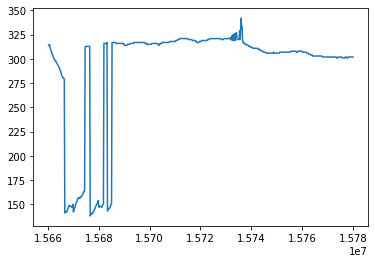

In [56]:
plt.plot(cds.t_step,[find_stratlayer(cds.temperature.sel(t_step=ts).squeeze().data,cds.radius)[1] for  ts in cds.t_step])

In [53]:
len(cds.radius)

361

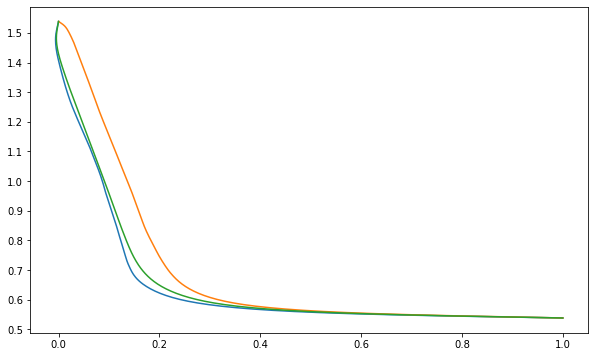

In [57]:

_,ax=plt.subplots(1,1,figsize=(10,6))
ax.plot(cds.temperature.isel(t_step=-1).squeeze(),cds.radius)
ax.plot(cds.temperature.sel(t_step=15670000).squeeze(),cds.radius)
ax.plot(cds.temperature.isel(t_step=slice(-200,-1)).mean('t_step').squeeze(),cds.radius)
ax.set_yticks(np.arange(0.5,1.6,.1));None

# Plotting picked modes / layered power spectra 

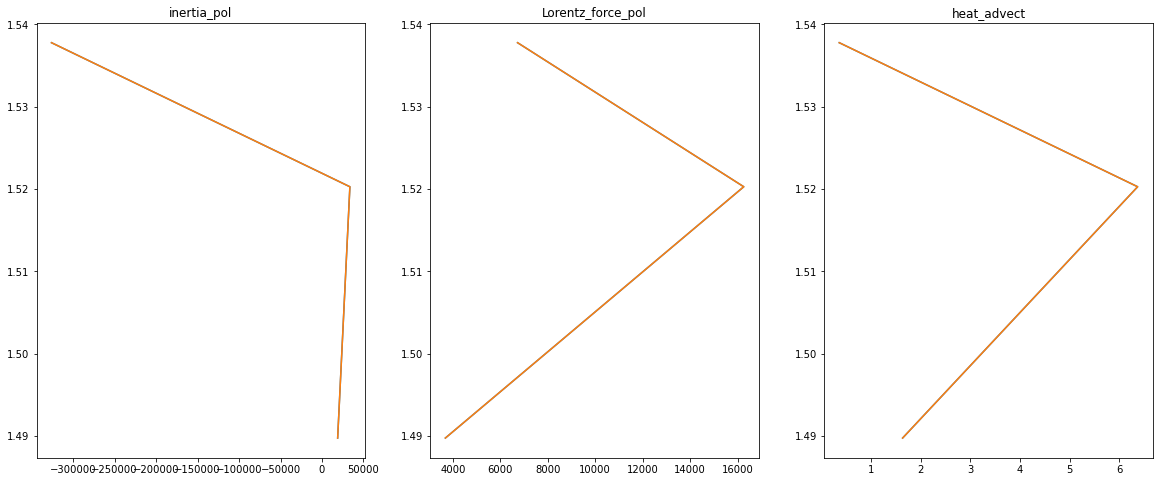

In [7]:
_,ax=plt.subplots(1,3,figsize=(20,8))

for a,var in zip(ax,['inertia_pol','Lorentz_force_pol','heat_advect']):
    a.plot(picked[var].sel(degree=3).mean('t_step').squeeze(),picked.radius)
    a.plot(picked[var].sel(degree=3).mean('t_step').squeeze(),picked.radius)
    a.set_title(var)

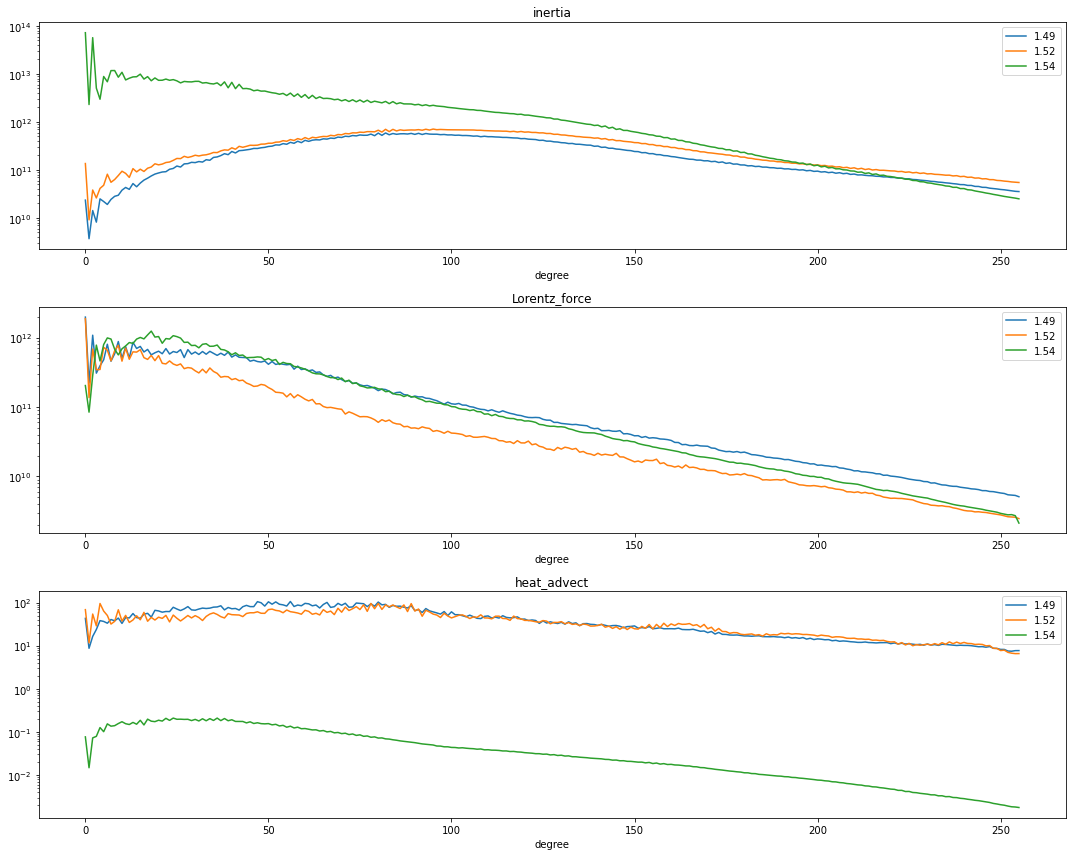

In [14]:
fig,ax=plt.subplots(3,1,figsize=(15,12))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(3):
        a.plot(layered_l.degree,layered_l[var].isel(radial_id=i).mean('t_step').squeeze(),label="%.2f"%picked.radius[i])
    a.set_title(var)
    a.set_xlabel('degree')
    a.set_yscale('log')
    a.legend()
fig.tight_layout()

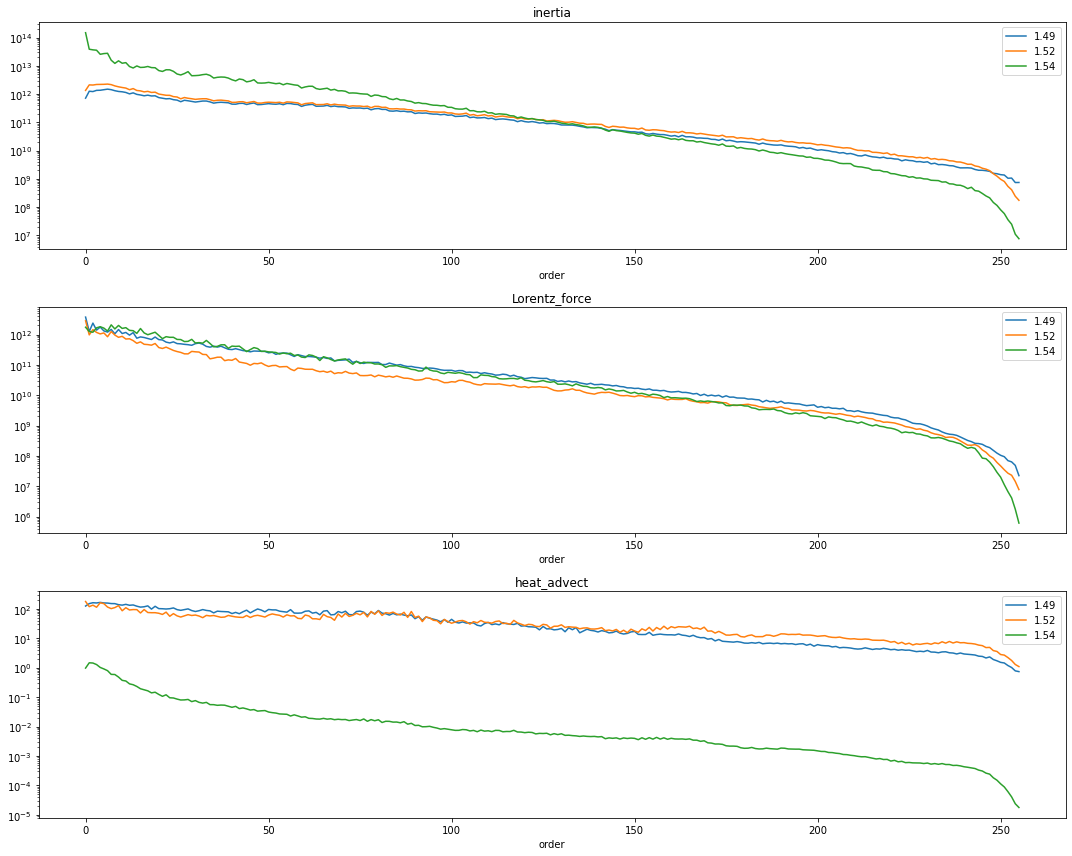

In [18]:
fig,ax=plt.subplots(3,1,figsize=(15,12))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(3):
        a.plot(layered_m.order,layered_m[var].isel(radial_id=i).mean('t_step').squeeze(),label="%.2f"%picked.radius[i])
    a.set_title(var)
    a.set_xlabel('order')
    a.set_yscale('log')
    a.legend()
fig.tight_layout()

# Radial dependence of the forcings

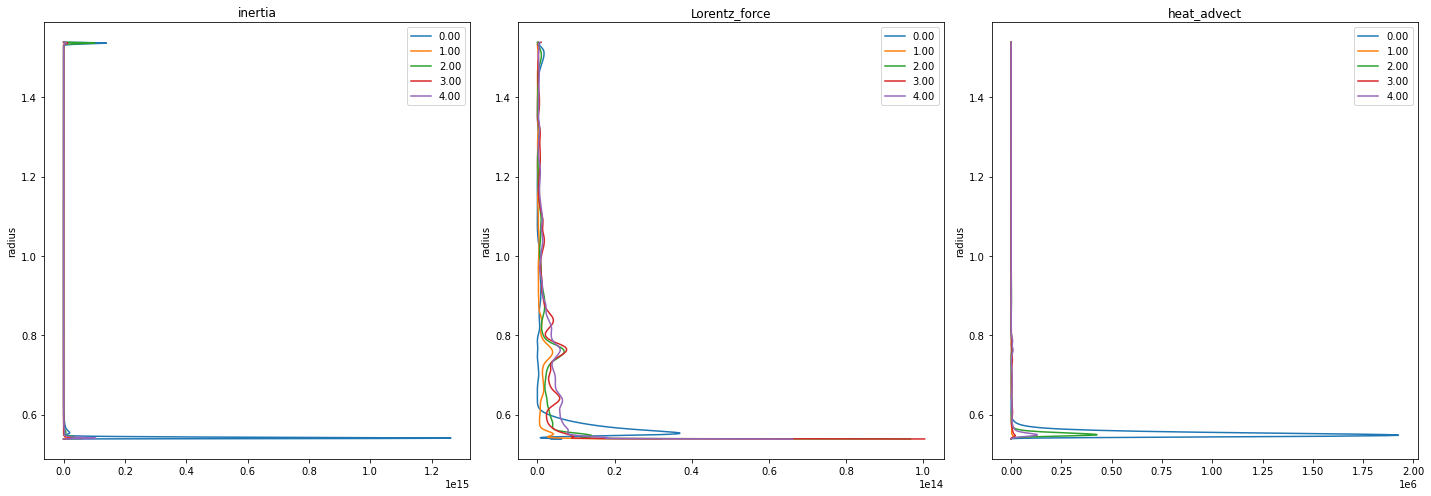

In [45]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(5):
        a.plot(layered_l_radial[var].isel(degree=i).mean('t_step').squeeze(),picked_radial.radius,label="%.2f"%layered_l_all.degree[i])
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
fig.tight_layout()

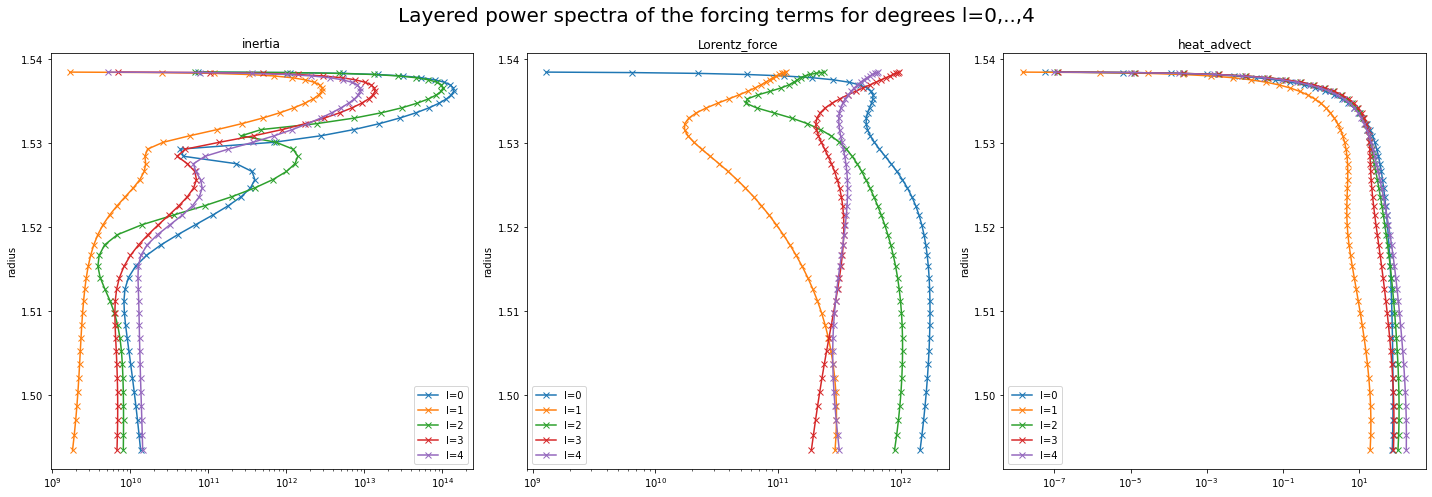

In [25]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(5):
        a.plot(layered_l_radial[var].isel(degree=i,radial_id=slice(-50,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="l=%i"%i)
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
    a.set_xscale('log')
fig.suptitle("Layered power spectra of the forcing terms for degrees l=0,..,4",fontsize=20)
fig.tight_layout()



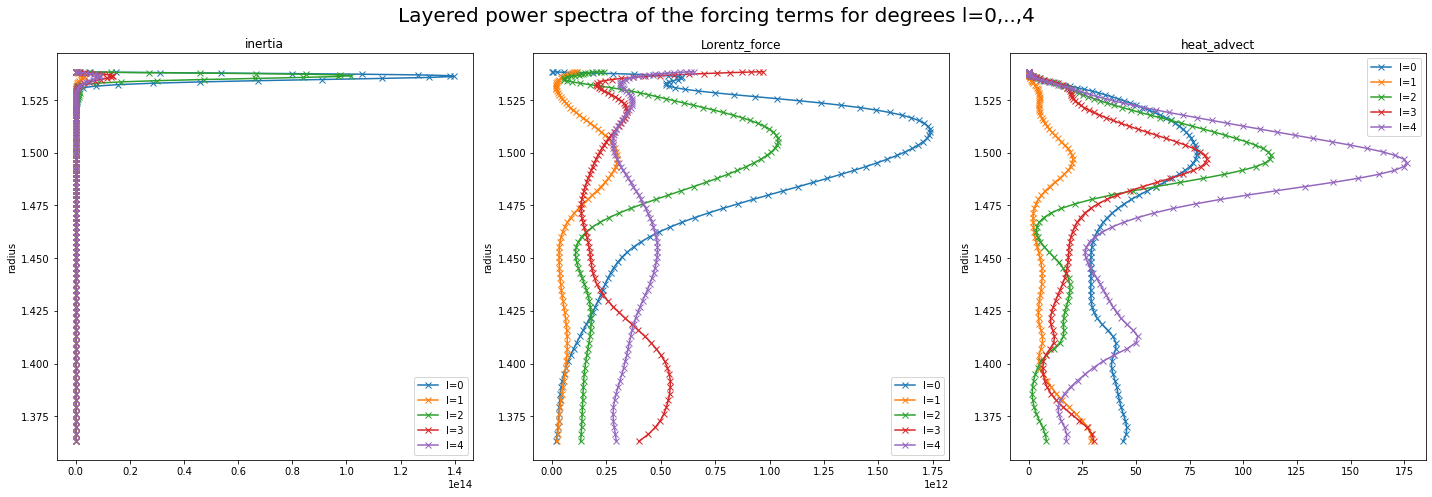

In [69]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(5):
        a.plot(layered_l_radial[var].isel(degree=i,radial_id=slice(-100,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-100,-1)),'-x',label="l=%i"%i)
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
    #a.set_xscale('log')
fig.suptitle("Layered power spectra of the forcing terms for degrees l=0,..,4",fontsize=20)
fig.tight_layout()



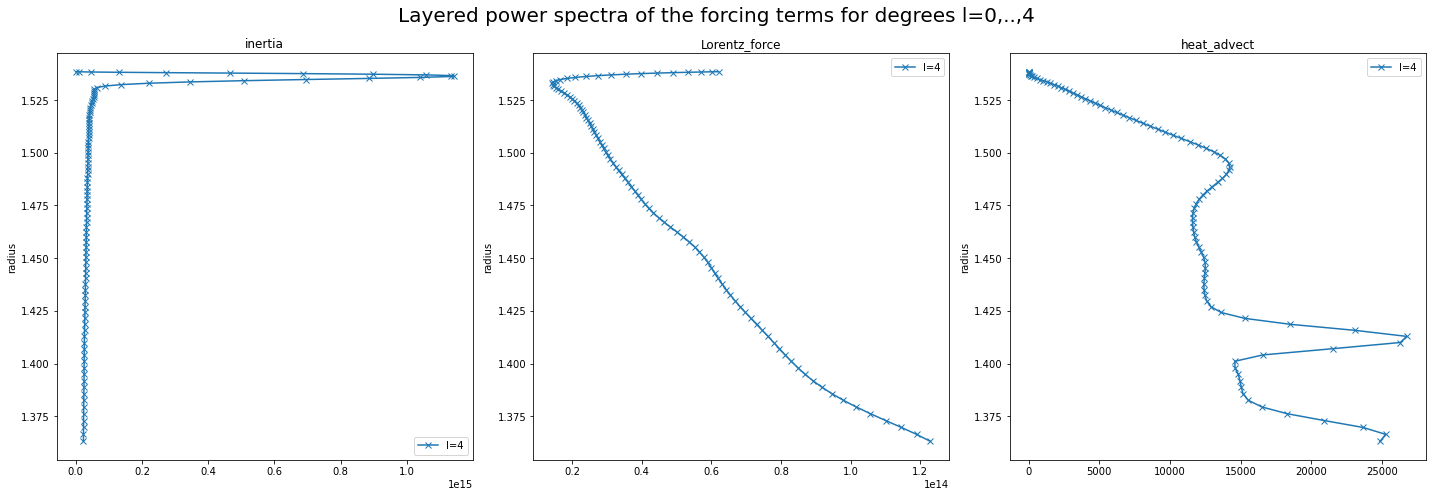

In [73]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    a.plot(layered_s_radial[var].isel(radial_id=slice(-100,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-100,-1)),'-x',label="l=%i"%i)
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
    #a.set_xscale('log')
fig.suptitle("Layered power spectra of the forcing terms for degrees l=0,..,4",fontsize=20)
fig.tight_layout()



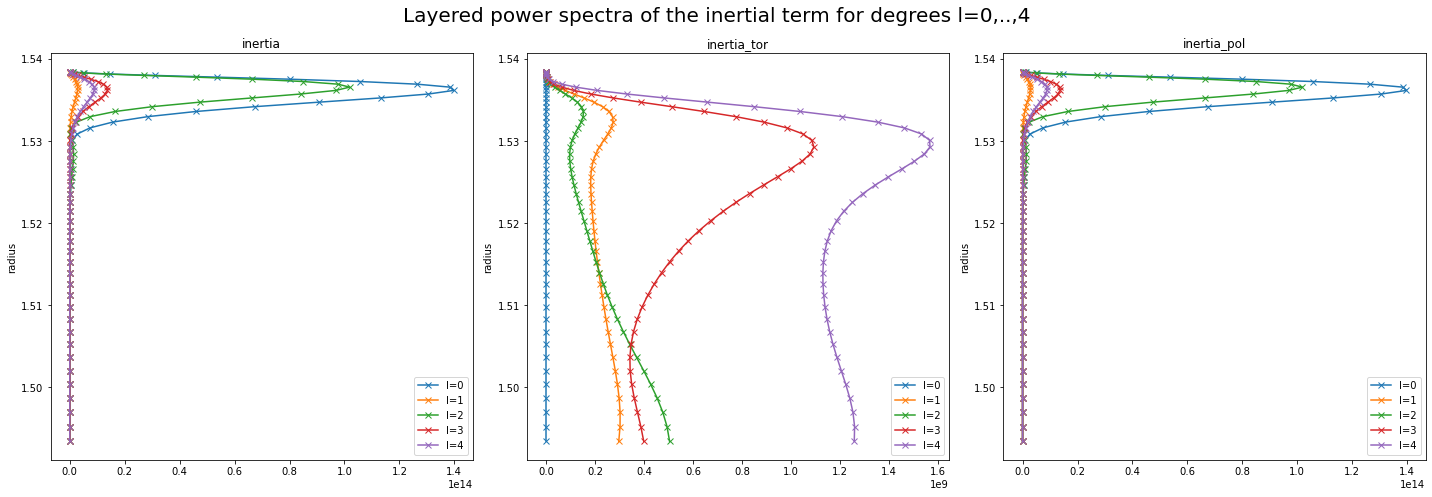

In [62]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','inertia_tor','inertia_pol']):
    for i in range(5):
        a.plot(layered_l_radial[var].isel(degree=i,radial_id=slice(-50,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="l=%i"%layered_l_all.degree[i])
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
    
fig.suptitle("Layered power spectra of the inertial term for degrees l=0,..,4",fontsize=20)
fig.tight_layout()



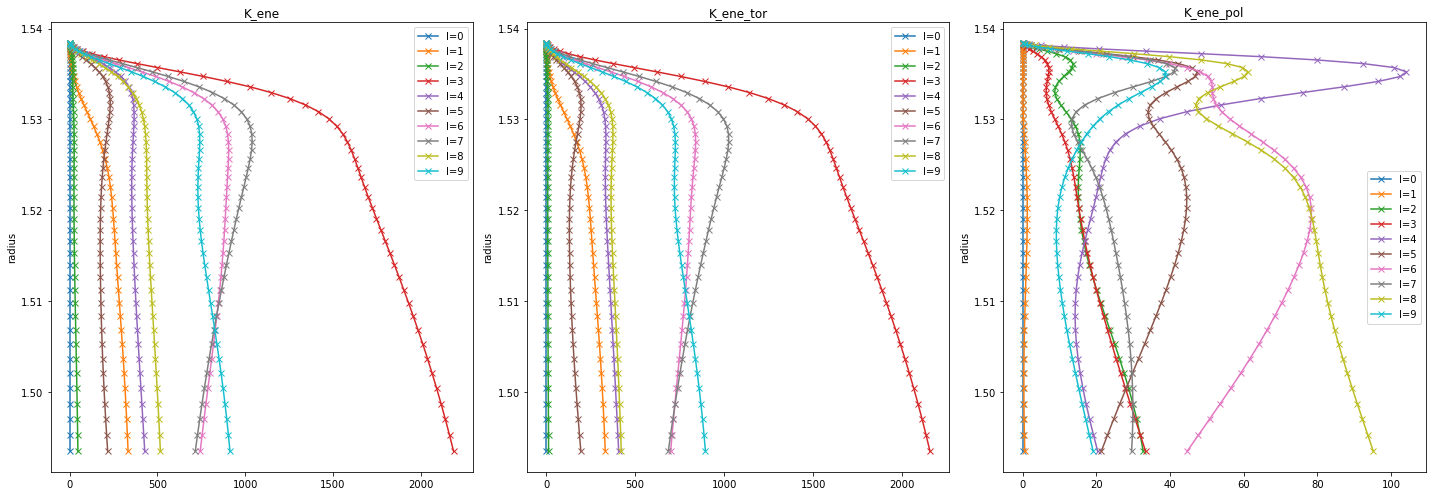

In [60]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['K_ene','K_ene_tor','K_ene_pol']):
    for i in range(10):
        a.plot(layered_l_radial[var].isel(degree=i,radial_id=slice(-50,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="l=%i"%layered_l_all.degree[i])
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
fig.tight_layout()



In [64]:
layered_s_radial_789 = dat_to_xarray("data/radial789/sph_pwr_layer_s.dat")
layered_s_radial_790 = dat_to_xarray("data/radial790/sph_pwr_layer_s.dat")


In [76]:
for sim in (layered_s_radial_789,layered_s_radial_790):
    print("n")
    for i in range(len(sim.t_step)):
        vals = sim[var].isel(t_step=i,radial_id=slice(-50,-1)).squeeze()
        valb = sim[var].isel(t_step=i,radial_id=-40).squeeze()
        print("%.1f"%(max(vals)/valb))


n
27.2
26.9
26.4
25.9
25.3
n
29.0
29.0


In [77]:
for sim in (layered_s_radial_789,layered_s_radial_790):
    print("n")
    for i in range(len(sim.t_step)):
        vals = sim[var].isel(t_step=i,radial_id=slice(-50,-1)).squeeze()
        valb = sim[var].isel(t_step=i,radial_id=-25).squeeze()
        print("%.1f"%(max(vals)/valb))


n
19.3
19.5
19.6
19.5
19.3
n
20.3
20.5


In [87]:
for sim in (layered_s_radial_789,layered_s_radial_790):
    print("n")
    for i in range(len(sim.t_step)-1):
        valip1 = sim[var].isel(t_step=i+1,radial_id=slice(-20,-1)).squeeze()
        vali = sim[var].isel(t_step=i,radial_id=slice(-20,-1)).squeeze()
        print("%.4f"%(max(valip1)/max(vali)))


n
0.9400
0.9487
0.9586
0.9674
n
1.0339


In [88]:
0.95**100

0.0059205292203339975

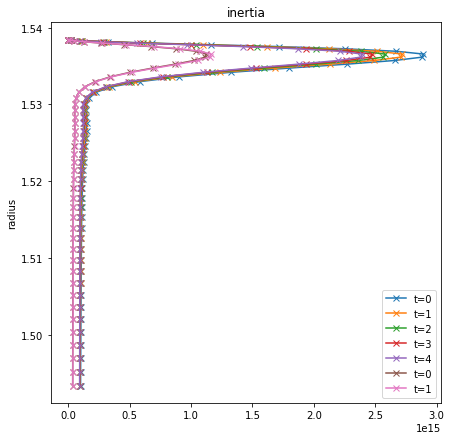

In [83]:
fig,a=plt.subplots(1,1,figsize=(7,7))
var='inertia'
for i in range(len(layered_s_radial_789.t_step)):
    a.plot(layered_s_radial_789[var].isel(t_step=i,radial_id=slice(-50,-1)).squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="t=%i"%i)

for i in range(len(layered_s_radial_790.t_step)):
    a.plot(layered_s_radial_790[var].isel(t_step=i,radial_id=slice(-50,-1)).squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="t=%i"%i)

    
    
a.set_title(var)
a.set_ylabel('radius')
a.legend()
    

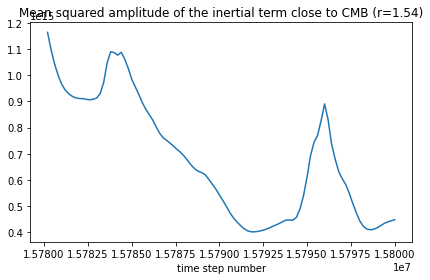

In [93]:
plt.plot(layered_s.t_step,layered_s.inertia.sel(radial_id=355).squeeze())
plt.title("Mean squared amplitude of the inertial term close to CMB (r=1.54)")
plt.xlabel("time step number")
plt.tight_layout()

In [7]:
picked_0 = dat_to_xarray("data/picked_bruce.dat")
picked_0_2 = dat_to_xarray("data/picked_bruce2.dat")

In [5]:
picked_0.t_step[-1]

<xarray.DataArray 't_step' ()>
array(15920000)
Coordinates:
    t_step   int64 15920000
    time     float64 7.807

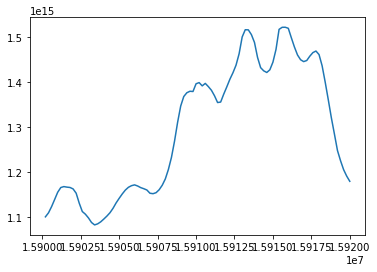

In [6]:
plt.plot(picked_0.t_step,picked_0.inertia_pol.isel(radius_ID=350).squeeze()**2)

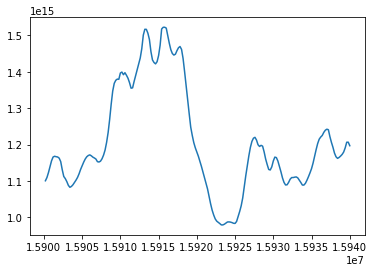

In [8]:
plt.plot(picked_0_2.t_step,picked_0_2.inertia_pol.isel(radius_ID=350).squeeze()**2)

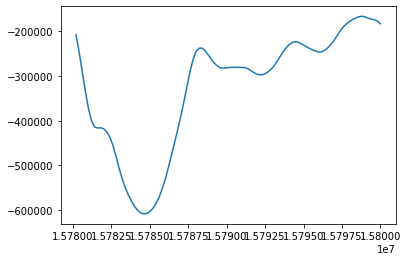

In [112]:
plt.plot(picked.t_step,picked.inertia_pol.sel(radius_ID=355,degree=3,order=3).squeeze())

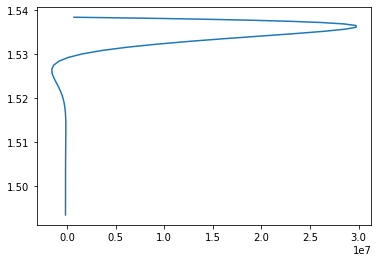

In [102]:
plt.plot(picked_0.inertia_pol.isel(t_step=-1,radius_ID=slice(-50,-1)).squeeze(),picked_0.radius.isel(radius_ID=slice(-50,-1)))

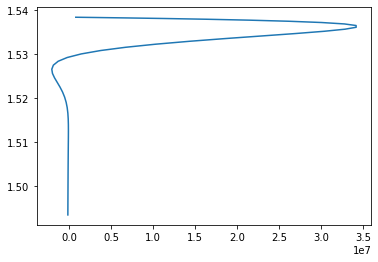

In [18]:
plt.plot(picked_0_2.inertia_pol.isel(t_step=100,radius_ID=slice(-50,-1)).squeeze(),picked_0_2.radius.isel(radius_ID=slice(-50,-1)))

# Wave response amplitude for Lorentz and Thermal forcings

## Parameters

In [6]:
Omega = 2*np.pi/86400
L = 3480e3*0.65
nu = 1e-6
print(nu/(Omega*L**2))

2.6875012377526668e-15


In [7]:
ngrid = 200                        # number of grid points in latitude (pole to pole)
m = 3
sectoyear = 365.25 * 24 * 60 * 60

In [8]:
# use realistic values
E = 1e-15
Pm = 1e-6
Rastar = 8e-5   # From "stochastic generation" (earth-like value)
Omega = 2*np.pi/86400

H=0.1 #Nondimensional layer thickness
kprime = np.pi/H
Nprime = 0.14/E   # From "stochastic generation"
Brprime = np.sqrt(float(layered_s.M_ene_pol.sel(radial_id=310).mean())*2)
omegaprime = 2*np.pi / (-40*sectoyear) / Omega / E 

C0 = 2/0.65**2 /E * kprime**2/Nprime**2
C = C0*omegaprime

chi = 1 +1j*kprime**2/omegaprime/Pm
M = 1/(E*Pm*0.65**2)*Brprime*kprime**4/(chi*Nprime**2)

G_inertia = 1/0.65**2 * Brprime * kprime**3/chi
G_lorentz = G_inertia/E/Pm
G_buoyancy = 1j/0.65**2 * Rastar/E * Brprime * kprime**3 / (chi*omegaprime)

In [9]:
print(C)

-16.31536298647805


## Results

C : -16.3
C : -16.1
Period : -40.6 years
Quality factor : 90.64


/Users/quentin.nicolas/miniconda3/envs/macwaves/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


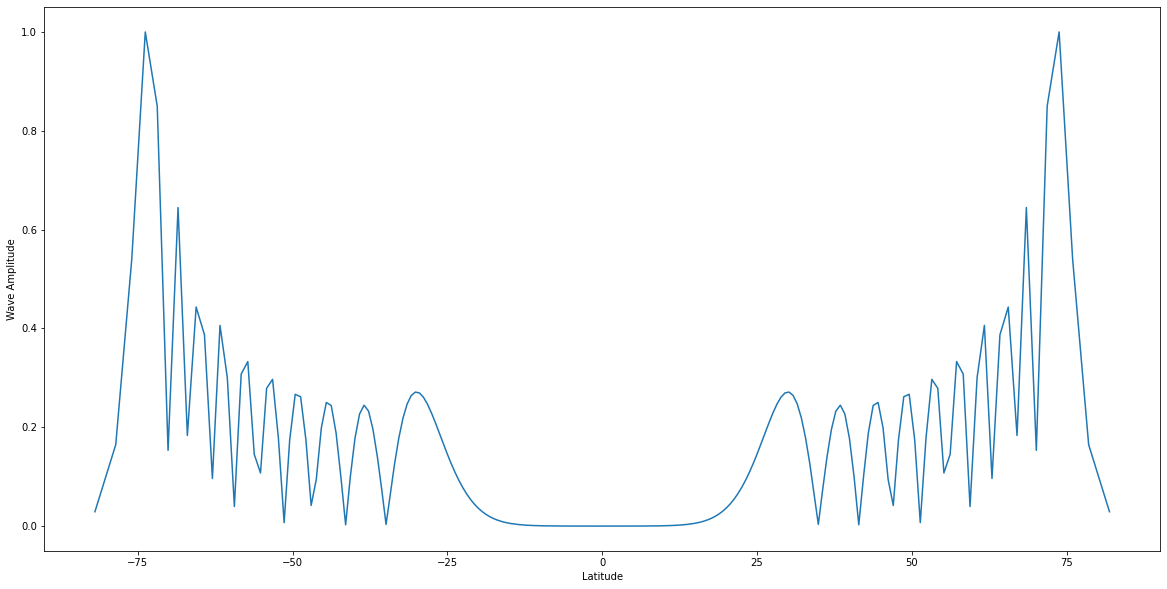

In [10]:
A=setA(ngrid,m,M)
Cdiag,bysec = modesy(A,C)
y = sety(ngrid)

print("C : %.1f"%(C))
print("C : %.1f"%(Cdiag))
pd = 2 * np.pi / (sectoyear* np.real(Cdiag/C0))/Omega/E; print("Period : %.1f years"%(pd))
q = np.abs(0.5*np.real(Cdiag)/np.imag(Cdiag)); print("Quality factor : %.2f"%q)


lat = np.arcsin(y)*180.0/np.pi

# Code to plot the eigenvector corresponding to the closest eigenvalue
_,ax=plt.subplots(1,1,figsize=(20,10))
by = bysec[:ngrid]/(1-y**2)
amp = np.max(np.abs(np.real(by)));
ax.plot(lat,np.abs(np.real(by))/amp)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wave Amplitude")
plt.show()



## Code to plot the matrix A
#_,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
#p1 = ax1.matshow(np.log10(np.abs(np.real(A))))
#plt.colorbar(p1,ax=ax1);ax1.set_title("log10(real(A))")
#p2 = ax2.matshow(np.log10(np.abs(np.imag(A))))
#plt.colorbar(p2,ax=ax2);ax2.set_title("log10(imag(A))")
#plt.show()

In [11]:
def select(var,deg):
    return var.isel(radius_ID=0).sel(degree=deg).mean('t_step')

In [12]:
Ith3, Iph3 = torpol_to_thetaphi_ycomplex_fixedrlm(y,select(picked.inertia_tor,3),select(picked.inertia_pol_dr,3),float(picked.radius[0]),3,3)
Ith4, Iph4 = torpol_to_thetaphi_ycomplex_fixedrlm(y,select(picked.inertia_tor,4),select(picked.inertia_pol_dr,4),float(picked.radius[0]),4,3)
Ith5, Iph5 = torpol_to_thetaphi_ycomplex_fixedrlm(y,select(picked.inertia_tor,5),select(picked.inertia_pol_dr,5),float(picked.radius[0]),5,3)

In [13]:
Lth3, Lph3 = torpol_to_thetaphi_ycomplex_fixedrlm(y,select(picked.Lorentz_force_tor,3),select(picked.Lorentz_force_pol_dr,3),float(picked.radius[0]),3,3)
Lth4, Lph4 = torpol_to_thetaphi_ycomplex_fixedrlm(y,select(picked.Lorentz_force_tor,4),select(picked.Lorentz_force_pol_dr,4),float(picked.radius[0]),4,3)
Lth5, Lph5 = torpol_to_thetaphi_ycomplex_fixedrlm(y,select(picked.Lorentz_force_tor,5),select(picked.Lorentz_force_pol_dr,5),float(picked.radius[0]),5,3)

In [14]:
Bth3, Bph3 = torpol_to_thetaphi_ycomplex_fixedrlm(y,select(picked.inertia_tor,3),select(picked.inertia_pol_dr,3),float(picked.radius[0]),3,3)
Bth4, Bph4 = torpol_to_thetaphi_ycomplex_fixedrlm(y,select(picked.inertia_tor,4),select(picked.inertia_pol_dr,4),float(picked.radius[0]),4,3)
Bth5, Bph5 = torpol_to_thetaphi_ycomplex_fixedrlm(y,select(picked.inertia_tor,5),select(picked.inertia_pol_dr,5),float(picked.radius[0]),5,3)

9.357656717300415
9.069402933120728
8.742309093475342


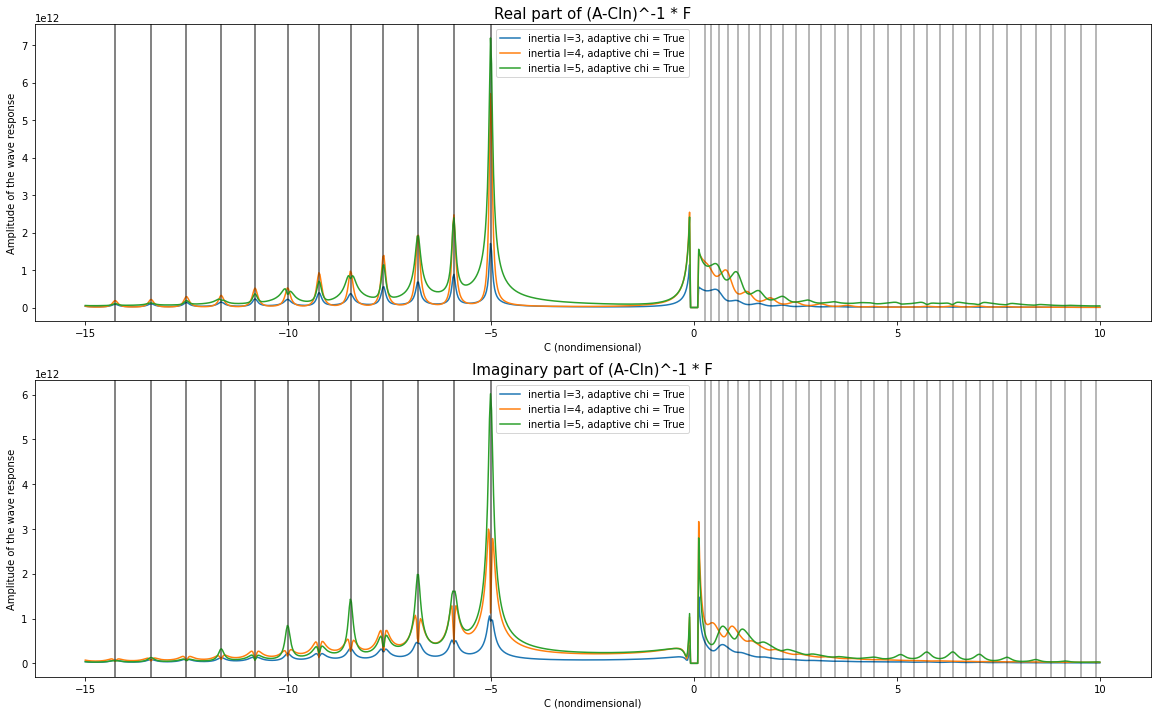

In [15]:
fig,ax=plt.subplots(2,1,figsize=(20,12))
plotResponses(ax,ngrid,m,M,G_inertia,Ith3,Iph3,"inertia l=3",adaptchi=True,Cref=C,chiref=chi ,bounds=[-15.,10.])
plotResponses(ax,ngrid,m,M,G_inertia,Ith4,Iph4,"inertia l=4",adaptchi=True,Cref=C,chiref=chi ,bounds=[-15.,10.])
plotResponses(ax,ngrid,m,M,G_inertia,Ith5,Iph5,"inertia l=5",adaptchi=True,Cref=C,chiref=chi ,bounds=[-15.,10.])

#plotResponses(ax,ngrid,m,M,G_lorentz,Ith,Iph,"inertia l=3",adaptchi=True ,bounds=[-15.,10.])
#plotResponses(ax,ngrid,m,M,G_buoyancy,Ith,Iph,"inertia l=3",adaptchi=True ,bounds=[-15.,10.])


7.7212512493133545
6.984673023223877
6.73848819732666


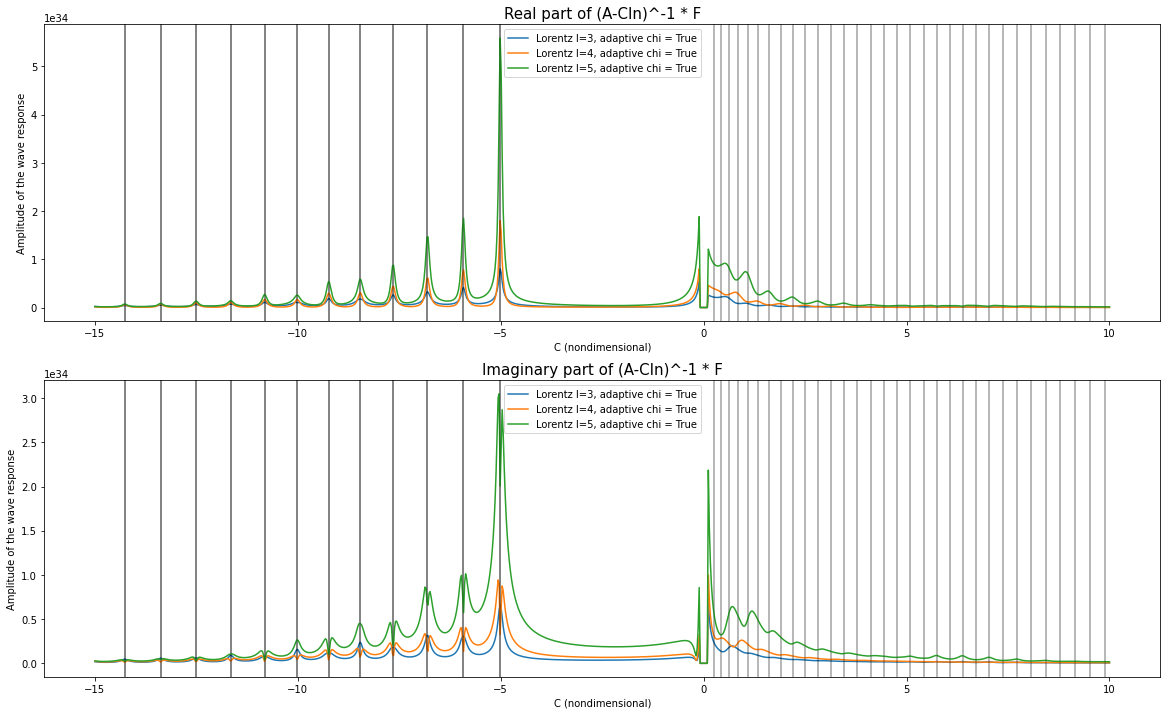

In [17]:
fig,ax=plt.subplots(2,1,figsize=(20,12))
plotResponses(ax,ngrid,m,M,G_lorentz,Lth3,Lph3,"Lorentz l=3",adaptchi=True,Cref=C,chiref=chi ,bounds=[-15.,10.])
plotResponses(ax,ngrid,m,M,G_lorentz,Lth4,Lph4,"Lorentz l=4",adaptchi=True,Cref=C,chiref=chi ,bounds=[-15.,10.])
plotResponses(ax,ngrid,m,M,G_lorentz,Lth5,Lph5,"Lorentz l=5",adaptchi=True,Cref=C,chiref=chi ,bounds=[-15.,10.])
